<a href="https://colab.research.google.com/github/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management/blob/master/src/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from numpy.linalg import *
import os

In [2]:
!git clone https://github.com/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management.git

Cloning into 'MA574_Portfolio-Valuation-and-Risk-Management'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 941 (delta 0), reused 0 (delta 0), pack-reused 937
Receiving objects: 100% (941/941), 3.79 MiB | 21.90 MiB/s, done.
Resolving deltas: 100% (438/438), done.


In [3]:
cd MA574_Portfolio-Valuation-and-Risk-Management/src/project3/report/

/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3/report


In [0]:
os.chdir('/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3/report')
file_chdir = os.getcwd()
filecsv_list = []
for root,dirs,files in os.walk(file_chdir):
  for file in files:
    if os.path.splitext(file)[1] == '.csv':
      filecsv_list.append(file)
for csv in filecsv_list:
  vars()[csv.strip('.csv')] = pd.read_csv(csv)


In [5]:
filecsv_list

['portfolio.csv', 'SP500.csv']

In [0]:
portfolio['date'] = pd.to_datetime(portfolio['date'],format='%Y%m%d')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


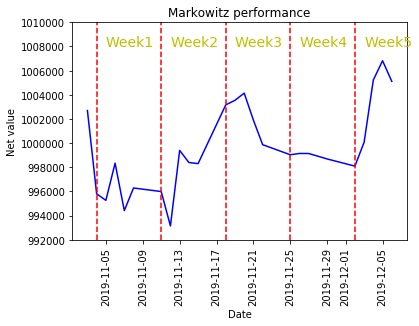

<Figure size 43200x36000 with 0 Axes>

In [7]:
#week to week profermance
plt.plot(portfolio['date'],portfolio['Net Value'],color = 'b')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Net value')
plt.title('Markowitz performance')
plt.axvline(portfolio['date'][1],color = 'r',  linestyle='--')
plt.axvline(portfolio['date'][6],color = 'r',  linestyle='--')
plt.axvline(portfolio['date'][11],color = 'r',  linestyle='--')
plt.axvline(portfolio['date'][16],color = 'r',  linestyle='--')
plt.axvline(portfolio['date'][20],color = 'r',  linestyle='--')
plt.ylim(992000,1010000)
plt.text(portfolio['date'][2], 1008000, 'Week1',
         fontdict={'size': 14, 'color': 'y'})
plt.text(portfolio['date'][7], 1008000, 'Week2',
         fontdict={'size': 14, 'color': 'y'})
plt.text(portfolio['date'][12], 1008000, 'Week3',
         fontdict={'size': 14, 'color': 'y'})
plt.text(portfolio['date'][17], 1008000, 'Week4',
         fontdict={'size': 14, 'color': 'y'})
plt.text(portfolio['date'][21], 1008000, 'Week5',
         fontdict={'size': 14, 'color': 'y'})
plt.figure(figsize = (600,500))
plt.show()

In [0]:
daily_return = np.array([np.log(portfolio['Net Value'][i]/portfolio['Prior Value'][i]) for i in range(1,portfolio.shape[0])])

<Figure size 432x288 with 0 Axes>

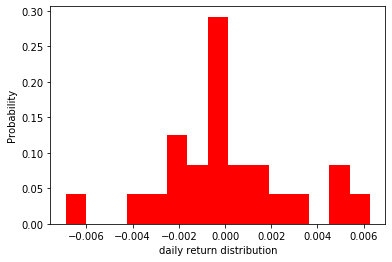

<Figure size 432x288 with 0 Axes>

In [9]:
counts_daily, bins_daily, bars_daily = plt.hist(daily_return,bins = 15,color = 'r', weights = [1./len(daily_return)]*len(daily_return))
plt.xlabel('daily return distribution')
plt.ylabel('Probability')
plt.figure()

In [10]:
#sharpe ratio for portfolio
rf = (1+0.0156)**(1/365) - 1
mu_p = (portfolio['Net Value'][24]/portfolio['Net Value'][0])**(1/24)-1
P_sharoe_ratio = (mu_p - rf)/np.sqrt(np.var(daily_return))
#sharpe ratio for market
market_return = np.array([np.log(SP500['Adj Close'][i+1]/SP500['Adj Close'][i]) for i in range(SP500.shape[0]-1)])
m_r = (SP500['Adj Close'][23]/SP500['Adj Close'][0])**(1/24)-1
M_sharoe_ratio = (m_r - rf)/np.sqrt(np.var(market_return))
print("Sharpe ratio for portfolio is %f, Sharpe ratio for portfolio is %f"%(P_sharoe_ratio,M_sharoe_ratio))

Sharpe ratio for portfolio is 0.020312, Sharpe ratio for portfolio is 0.150987


In [11]:
#Treynor ratio
beta_p = np.cov(daily_return,market_return)[0,1]/np.var(daily_return)
Treynor_ratio = (mu_p - rf)/beta_p
print("Treynor ratio for portfolio is %f"%Treynor_ratio)
#Treynor ratio for SP500 is just equal to mu_p - rf

Treynor ratio for portfolio is -0.000419


In [12]:
#information ratio
Information_ratio = (mu_p - m_r)/np.sqrt(np.var(daily_return-market_return))
print("Treynor ratio for portfolio is %f"%Information_ratio)
#we use market_return as benchmark, so market_return do not have information ratio

Treynor ratio for portfolio is -0.109407


In [13]:
#Sortine ratio with market_return as benchmark
sigma_negivate = np.mean(np.where((daily_return - m_r) < 0,daily_return - m_r,0)**2)
Sortine_ratio = (mu_p - m_r)/np.sqrt(sigma_negivate)
print("Sortine ratio for portfolio is %f (market_return as benchmark)"%Sortine_ratio)

#Sortine ratio with risk free as benchmark
sigma_negivate = np.mean(np.where((daily_return - rf) < 0,daily_return - rf,0)**2)
Sortine_ratio = (mu_p - rf)/np.sqrt(sigma_negivate)
print("Sortine ratio for portfolio is %f (risk free as benchmark)"%Sortine_ratio)


#Sortine ratio with market_return as benchmark
sigma_negivate = np.mean(np.where((market_return - rf) < 0,market_return - rf,0)**2)
Sortine_ratio = (m_r - rf)/np.sqrt(sigma_negivate)
print("Sortine ratio for SP500 is %f (risk free as benchmark)"%Sortine_ratio)

Sortine ratio for portfolio is -0.254676 (market_return as benchmark)
Sortine ratio for portfolio is 0.030260 (risk free as benchmark)
Sortine ratio for SP500 is 0.247038 (risk free as benchmark)


In [14]:
#Maximum drawdrom
Max_drawdrom = 0
index1,index2 = 0,0
for i in range(portfolio.shape[0]-1):
  for j in range(i+1,portfolio.shape[0]):
    if ((portfolio['Net Value'][i] - portfolio['Net Value'][j]) > Max_drawdrom):
      Max_drawdrom = portfolio['Net Value'][i] - portfolio['Net Value'][j]
      index1,index2 = i,j
print("Maximum drawdrom for portfolio is %f between %s and %s"%(Max_drawdrom,portfolio['date'][index1],portfolio['date'][index2]))


Max_drawdrom_market = 0
index3,index4 = 0,0
for i in range(SP500.shape[0]-1):
  for j in range(i+1,SP500.shape[0]):
    if ((SP500['Adj Close'][i] - SP500['Adj Close'][j]) > Max_drawdrom_market):
      Max_drawdrom_market = (SP500['Adj Close'][i] - SP500['Adj Close'][j])*portfolio['Net Value'][0]/SP500['Adj Close'][0]
      index3,index4 = i,j

print("Maximum drawdrom for SP500 is %f between %s and %s"%(Max_drawdrom_market,portfolio['date'][index3],portfolio['date'][index4]))     

Maximum drawdrom for portfolio is 9550.524500 between 2019-11-03 00:00:00 and 2019-11-12 00:00:00
Maximum drawdrom for SP500 is 1193.292424 between 2019-11-04 00:00:00 and 2019-11-05 00:00:00


In [15]:
#Analysis of portfolio alpha and beta
beta,alpha = np.polyfit(daily_return - rf,market_return - rf,1)
print("Alpha and beta of this portfolio is %f and %f"%(alpha,beta))

Alpha and beta of this portfolio is 0.001025 and -0.132447


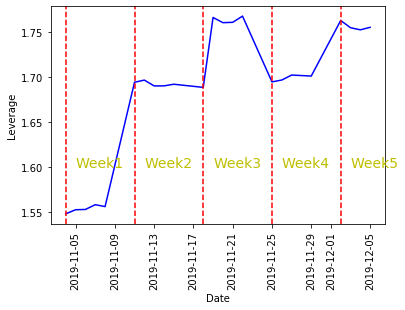

<Figure size 43200x36000 with 0 Axes>

In [16]:
#Leverage
Leverage = np.array([(portfolio['Long'][i]+abs(portfolio['Short'][i]))/portfolio['Net Value'][i] for i in range(1,portfolio.shape[0]-1)])
plt.plot(portfolio['date'][1:-1],Leverage,color = 'b')
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Leverage')
plt.axvline(portfolio['date'][1],color = 'r',  linestyle='--')
plt.axvline(portfolio['date'][6],color = 'r',  linestyle='--')
plt.axvline(portfolio['date'][11],color = 'r',  linestyle='--')
plt.axvline(portfolio['date'][16],color = 'r',  linestyle='--')
plt.axvline(portfolio['date'][20],color = 'r',  linestyle='--')
plt.text(portfolio['date'][2], 1.6, 'Week1',
         fontdict={'size': 14, 'color': 'y'})
plt.text(portfolio['date'][7], 1.6, 'Week2',
         fontdict={'size': 14, 'color': 'y'})
plt.text(portfolio['date'][12], 1.6, 'Week3',
         fontdict={'size': 14, 'color': 'y'})
plt.text(portfolio['date'][17], 1.6, 'Week4',
         fontdict={'size': 14, 'color': 'y'})
plt.text(portfolio['date'][21], 1.6, 'Week5',
         fontdict={'size': 14, 'color': 'y'})
plt.figure(figsize = (600,500))
plt.show()